In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

References taken from https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42

In [38]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [41]:
df = df.drop(["Genre","CustomerID","Age"],axis=1).values # Applying .values converts the dataframe into a matrix

In [42]:
print(df)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [43]:
m = df.shape[0]
n = df.shape[1]

iterations = 100
K=5

In [44]:
print(m,n)

200 2


In [45]:
Cent = np.array([]).reshape(n,0) #Initialising an empty array for K centroids... The reshape() function is applies so that the dimension of Cent matches with that of the dataframe
for i in range(K):
    r = rd.randint(0,m-1) # Generates a random number between 0 and m, where m is the number of tuples
    Cent = np.c_[Cent,df[r]]

In [46]:
print(Cent.shape)
print(Cent) #The printed array is an array consisting of five randomly chosen centroids

(2, 5)
[[87. 65. 97. 54. 60.]
 [10. 50. 86. 46. 42.]]


The output of our algorithm should be a dictionary with cluster number as Keys and the data points which belong to that cluster as values

In [47]:
op = {}

In [48]:
print(df)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [49]:
print(Cent)

[[87. 65. 97. 54. 60.]
 [10. 50. 86. 46. 42.]]


The main algorithm has two components each of which has been separately shown below and the combined and run later in the program

In [50]:
# distance = np.array([]).reshape(m,0) #An empty array is initialised to stores distance of each point from each of the five centroids
# for k in range(K):
#     temp = np.sum((df-Cent[:,k])**2,axis=1) # The EUCLIDIAN DISTANCE is calculalted as follow and then appended to the array
#     distance = np.c_[distance,temp]
# print(distance)
# C = np.argmin(distance,axis=1)+1 # .argmin() Returns the indices of the minimum values along an axis.
# print(C)

This is the second module which classifies the points by making a dictionary, wherein the key is the cluster number and value for that keyy is the array of elements which belong to that cluster

In [51]:
# Y = {} #An empty dictionary is initialised
# for k in range(K):
#     Y[k+1] = np.array([]).reshape(2,0) #The key number in the dictionary starts from 1 to K, which is the number of clusters
# for i in range(m):
#     Y[C[i]] = np.c_[Y[C[i]],df[i]] # Here m is 200, i.e the number of tuples, C[i] is the the cluster number assigned to that tuple, refer the above step.
# for k in range(K):
#     Y[k+1] = Y[k+1].T #This step takes transpose of the value stored in for the key K
# for k in range(K):
#     Cent[:,k] = np.mean(Y[k+1],axis=0) #Here we are calculating the new centroid after kth iteration of clustering is complete


The cell below shows both the above explained steps combined together

In [52]:
for i in range(iterations):
    Distance=np.array([]).reshape(m,0) 
    for k in range(K):
        tempDist=np.sum((df-Cent[:,k])**2,axis=1)
        Distance=np.c_[Distance,tempDist]
    C=np.argmin(Distance,axis=1)+1
    
   
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],df[i]]
    
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
          Cent[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

In [53]:
print(Y) #Here Y is the dictionary wherein the key is cluster number and values are array of elements belonging to that particular cluster

{1: array([[ 70.,  29.],
       [ 71.,  11.],
       [ 71.,   9.],
       [ 73.,   5.],
       [ 73.,   7.],
       [ 74.,  10.],
       [ 75.,   5.],
       [ 77.,  12.],
       [ 77.,  36.],
       [ 78.,  22.],
       [ 78.,  17.],
       [ 78.,  20.],
       [ 78.,  16.],
       [ 78.,   1.],
       [ 78.,   1.],
       [ 79.,  35.],
       [ 81.,   5.],
       [ 85.,  26.],
       [ 86.,  20.],
       [ 87.,  27.],
       [ 87.,  13.],
       [ 87.,  10.],
       [ 88.,  13.],
       [ 88.,  15.],
       [ 93.,  14.],
       [ 97.,  32.],
       [ 98.,  15.],
       [ 99.,  39.],
       [101.,  24.],
       [103.,  17.],
       [103.,  23.],
       [113.,   8.],
       [120.,  16.],
       [126.,  28.],
       [137.,  18.]]), 2: array([[15., 81.],
       [16., 77.],
       [17., 76.],
       [18., 94.],
       [19., 72.],
       [19., 99.],
       [20., 77.],
       [20., 79.],
       [21., 66.],
       [23., 98.],
       [24., 73.],
       [25., 73.],
       [28., 82.],
       [2

Text(0.5, 1.0, 'Unclustured Data')

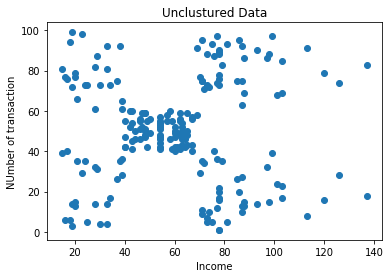

In [54]:
plt.scatter(df[:,0],df[:,1])
plt.xlabel("Income")
plt.ylabel("NUmber of transaction")
plt.title("Unclustured Data")

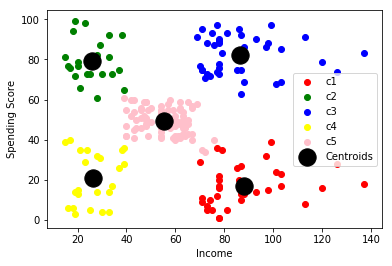

In [58]:
color = ['red','green','blue','yellow','pink']
labels = ['c1','c2','c3','c4','c5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Cent[0,:],Cent[1,:],s=300,c='black',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()

**What sense does the above clustering make**
The **Yellow** cluster shows people with limited income but high number of transactions. The company could release several low priced products in the area with maximum of such customers
The **Pink** cluster shows people with low income and low shopping score. In such a case company should not invest much on marketing in the area with maximum of such peole
The **Green** cluster shows the people with medium income and medium spending score
The **Red** one shows people with high income but a low spending score. Such are the people who do not shell out the money they have for shopping
And finally, the **Blue** ones are those who have money and spend accordingly.

***